In [201]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [203]:
#load the data
wine_data=pd.read_csv("Downloads/PCA (1)/PCA/wine.csv")
#Exploratory Datasets
print("Total missing Values in the wine dataset:",wine_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in wine datasets:",end=" ")
print(wine_data.duplicated().sum()) 
print(wine_data.head(5))

Total missing Values in the wine dataset: 0
No.of duplicate in wine datasets: 0
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


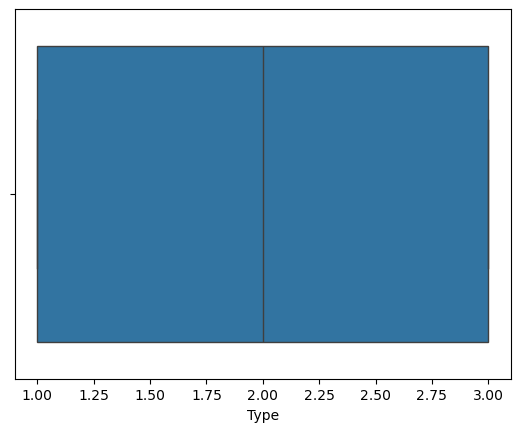

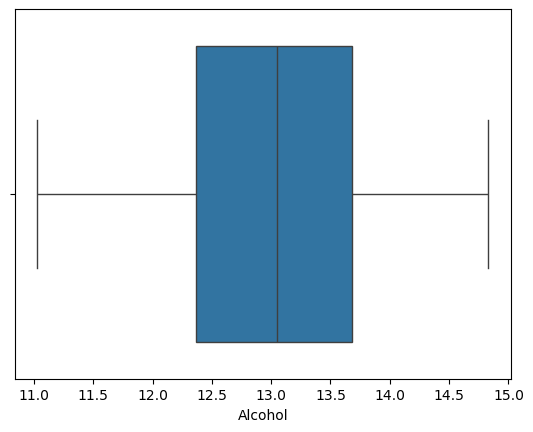

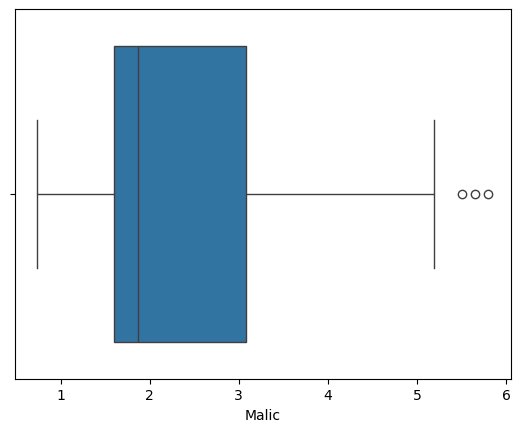

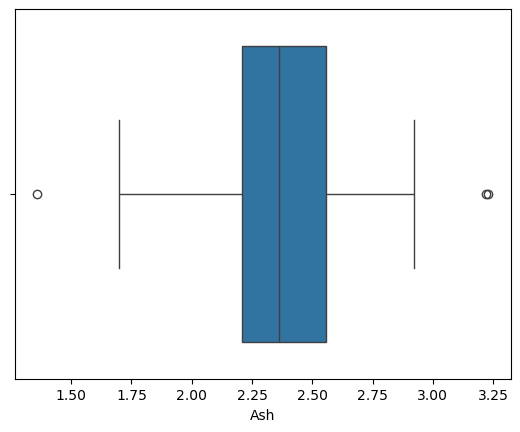

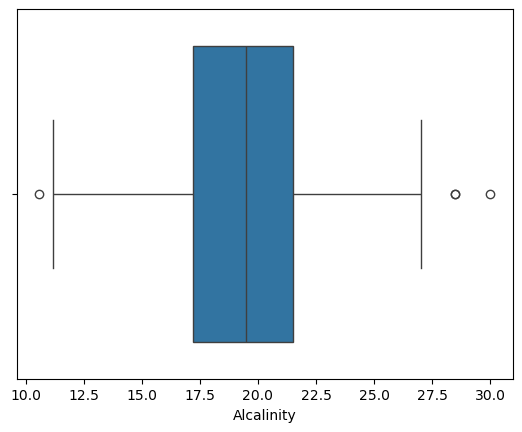

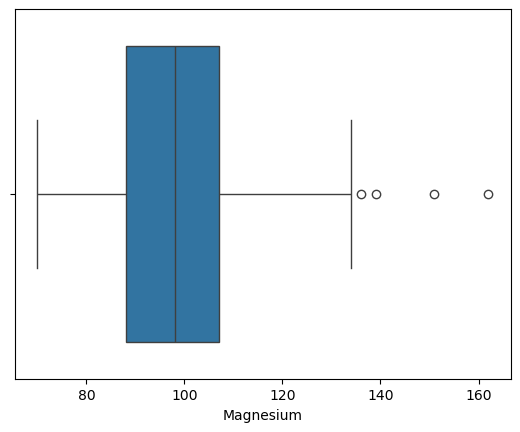

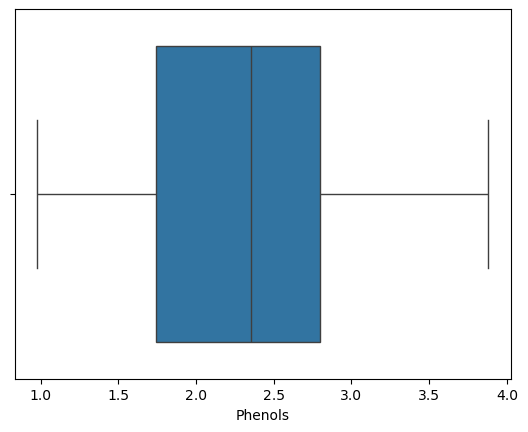

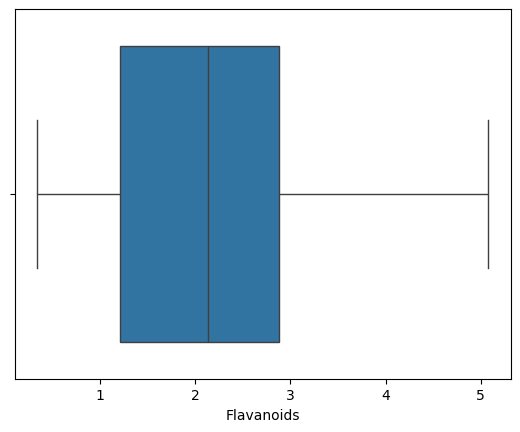

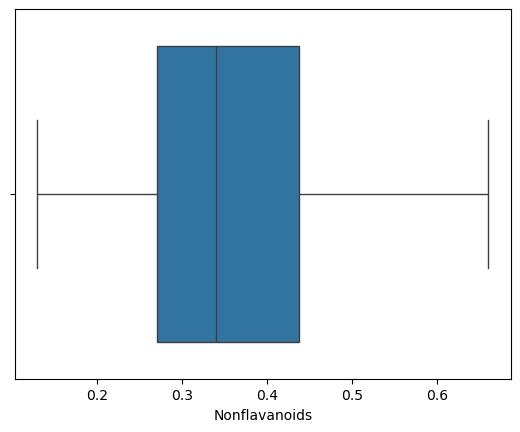

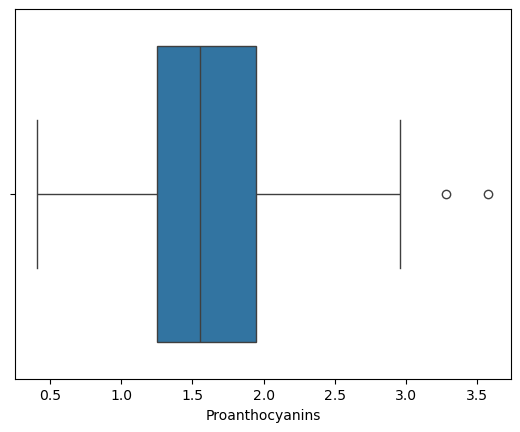

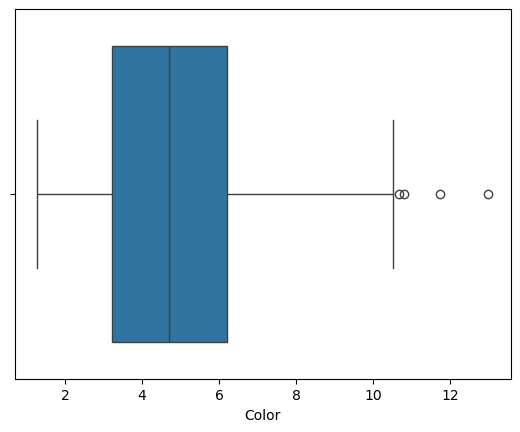

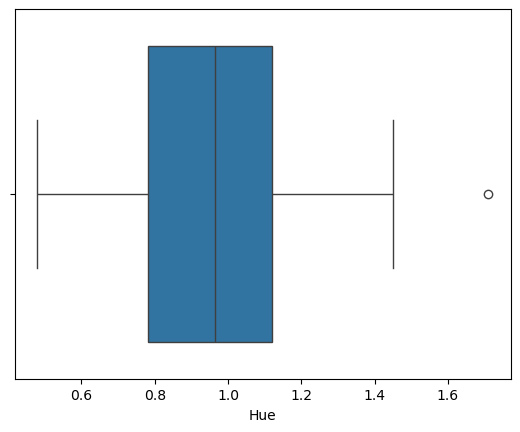

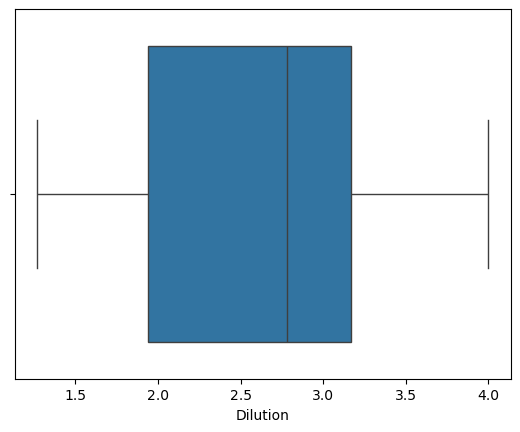

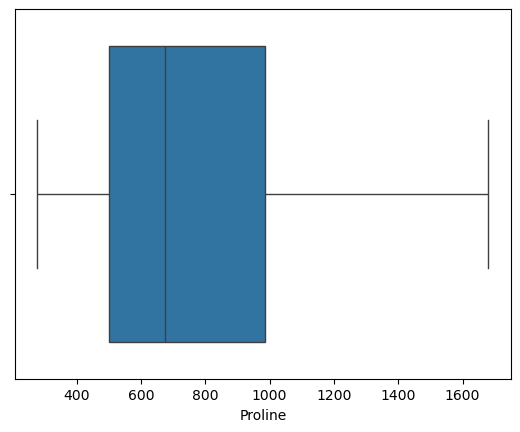

In [205]:
##Find outliers using boxplot for  dataset
for i in wine_data.select_dtypes(include="number").columns:
    sns.boxplot(data=wine_data,x=i)
    plt.show()

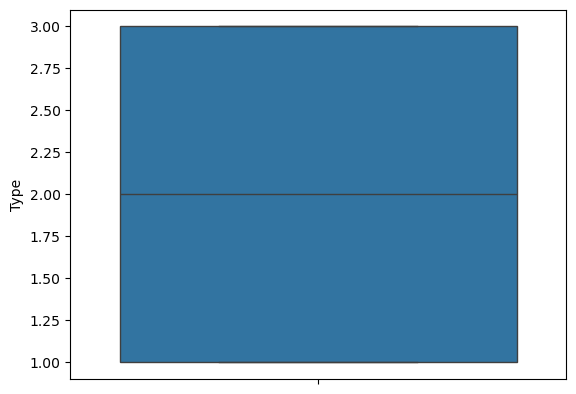

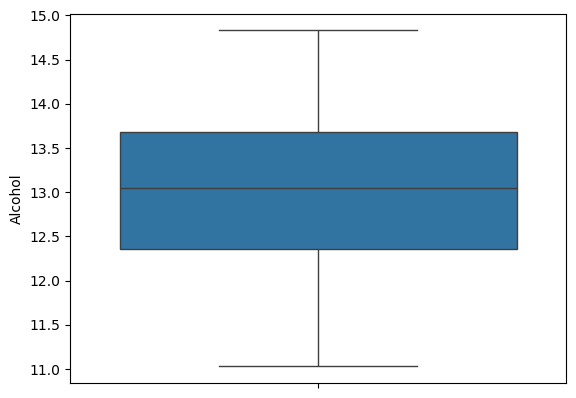

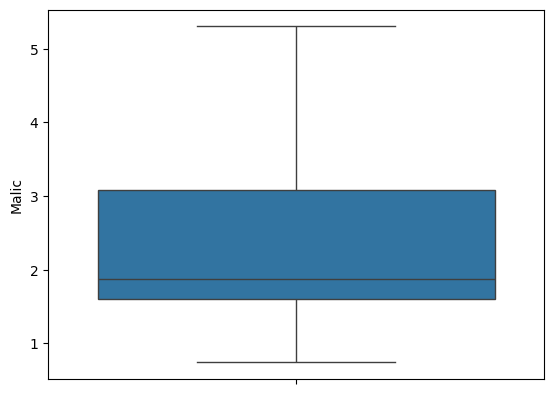

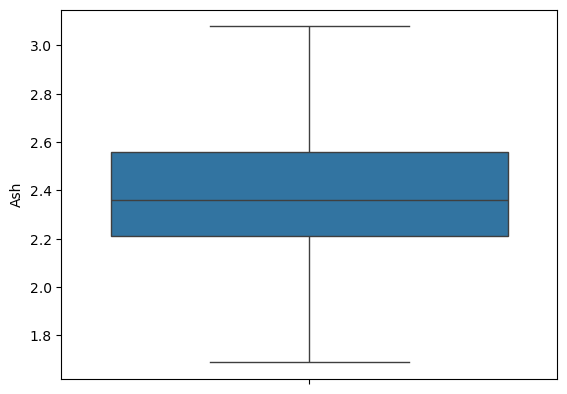

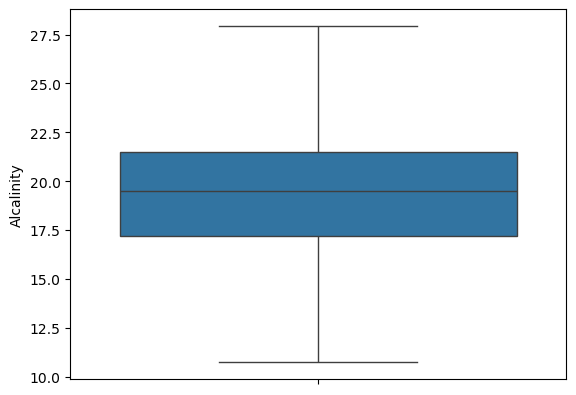

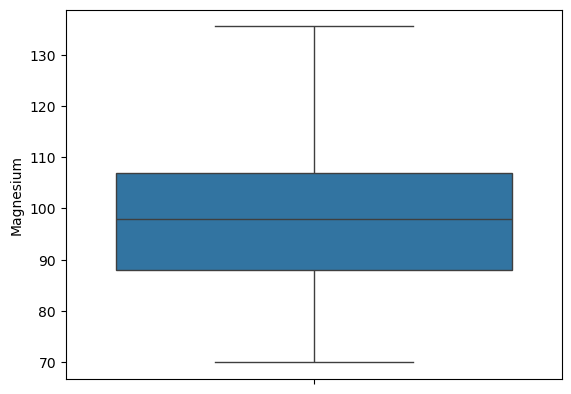

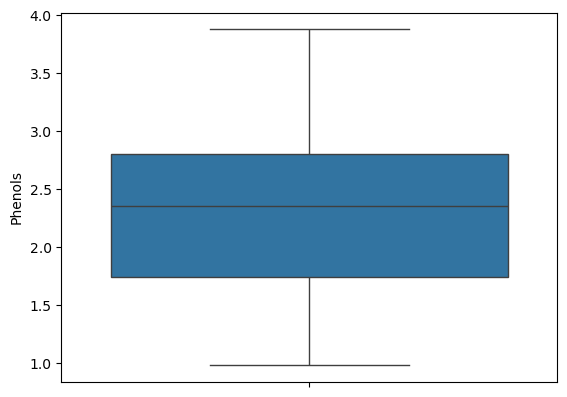

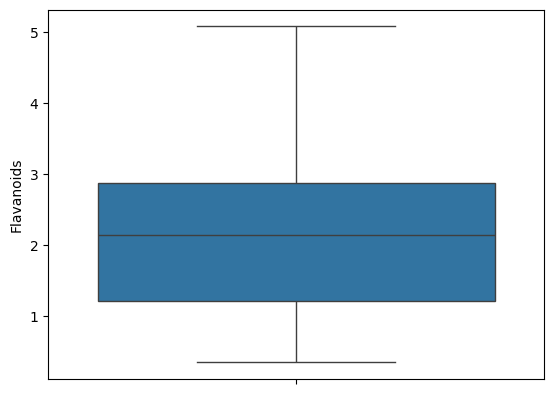

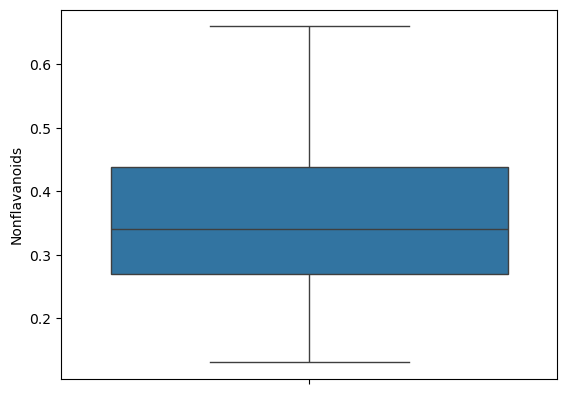

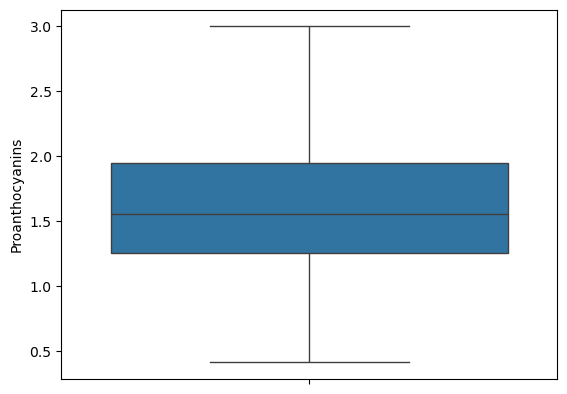

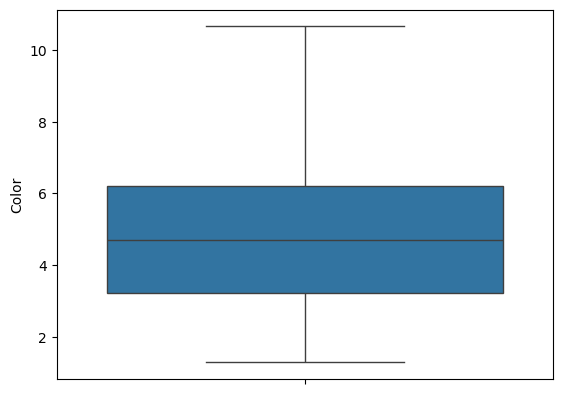

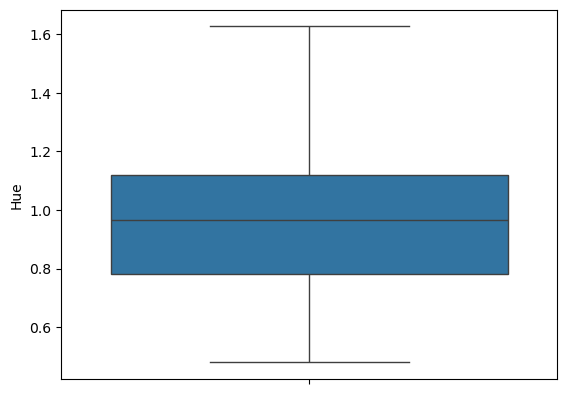

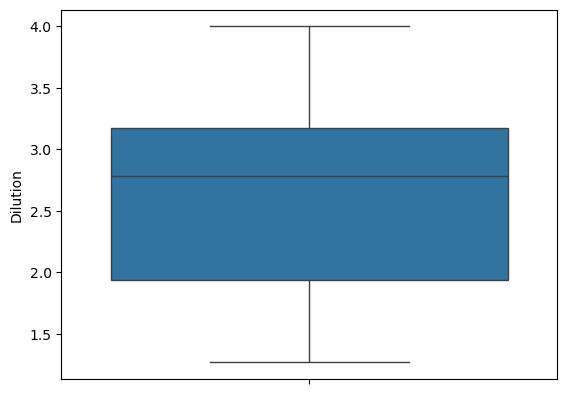

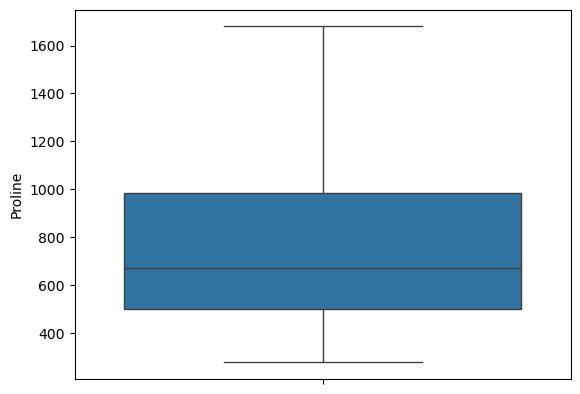

In [207]:
#Treatment for outliers/boxplot capping for  data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in wine_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(wine_data[i])
    wine_data[i]=np.where(wine_data[i]<lower,lower,wine_data[i])
    wine_data[i]=np.where(wine_data[i]>upper,upper,wine_data[i])

#box plot after capping  train dataset
for i in wine_data.select_dtypes(include="number").columns:
    sns.boxplot(wine_data[i])
    plt.show()

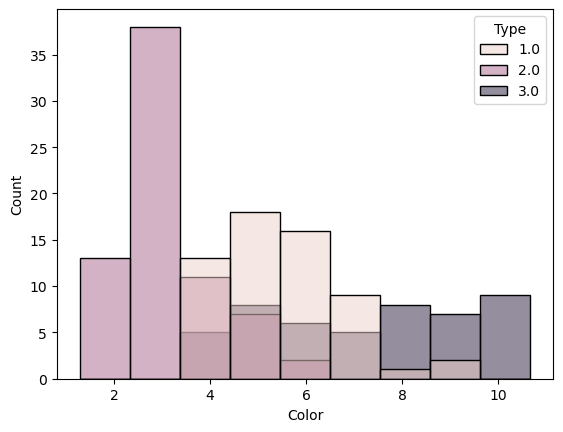

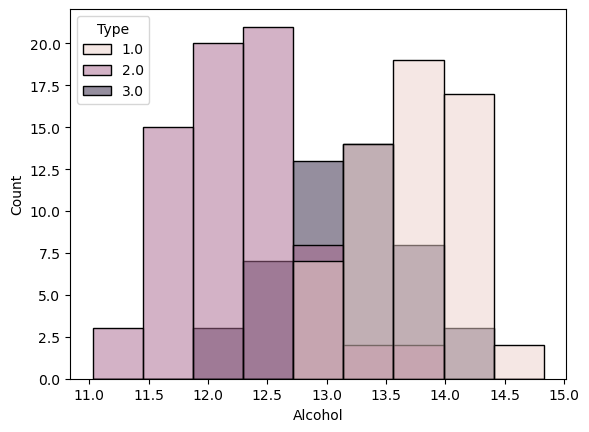

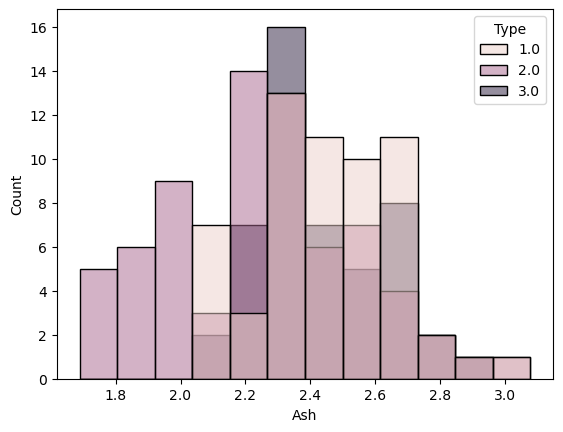

In [209]:
#histogram plot
sns.histplot(x="Color",data=wine_data,hue="Type")
plt.show()
sns.histplot(x="Alcohol",data=wine_data,hue="Type")
plt.show()
sns.histplot(x="Ash",data=wine_data,hue="Type")
plt.show()

In [211]:
#correlation dataset
print("The correlation relationship between dataset")
c=wine_data.corr()
print(c)

The correlation relationship between dataset
                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.440422 -0.047680    0.525608   
Alcohol         -0.328222  1.000000  0.094756  0.220174   -0.312191   
Malic            0.440422  0.094756  1.000000  0.166614    0.295882   
Ash             -0.047680  0.220174  0.166614  1.000000    0.427713   
Alcalinity       0.525608 -0.312191  0.295882  0.427713    1.000000   
Magnesium       -0.224264  0.302173 -0.039329  0.322510   -0.098030   
Phenols         -0.719163  0.289101 -0.339050  0.124436   -0.333046   
Flavanoids      -0.847498  0.236815 -0.414875  0.097562   -0.363405   
Nonflavanoids    0.489109 -0.155929  0.294203  0.183666    0.369276   
Proanthocyanins -0.512528  0.153171 -0.234575  0.006080   -0.208794   
Color            0.260260  0.549107  0.264897  0.256799    0.009748   
Hue             -0.621549 -0.067156 -0.566409 -0.075904   -0.286664   
Dilution        -0.788230  0.072

Heatmap for correlation


<Axes: >

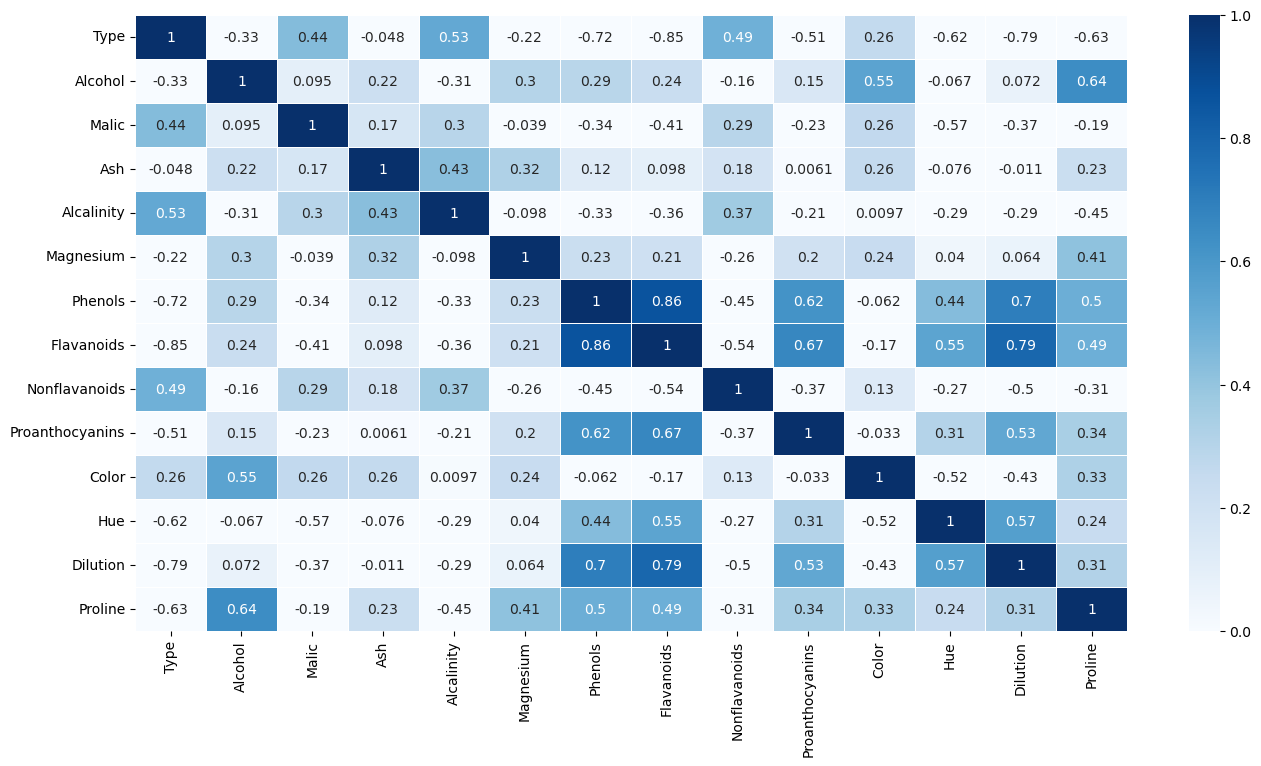

In [213]:
#heatmap for correlation
print("Heatmap for correlation")
plt.figure(figsize=(16,8))
sns.heatmap(c,vmin=0,vmax=1,cmap="Blues",linewidths=0.5,annot=True)

In [215]:
#summary data
print("The Five summary for data:\n")
print(wine_data.describe())

The Five summary for data:

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.330435    2.366721   19.478090   99.483146   
std      0.775035    0.811827    1.100173    0.263705    3.287757   13.414186   
min      1.000000   11.030000    0.740000    1.688750   10.750000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.302500    3.078750   27.950000  135.500000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.586067    5.038146   
std      0.

In [217]:
#select the data
x=wine_data.drop(columns=["Type"])
y=wine_data["Type"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [219]:
from sklearn.preprocessing import StandardScaler
standscaler=StandardScaler() 
x_train=standscaler.fit_transform(x_train)
print(x_train)

[[ 1.29559674 -0.16568321 -0.27710906 ...  1.32531903  0.82014739
   2.42617209]
 [ 0.25985753  1.69488835 -0.43360715 ... -1.58329905 -1.41361597
   0.24954563]
 [ 1.09593617 -0.54306329 -0.39448263 ...  0.75240941  0.72302724
   1.62001414]
 ...
 [ 0.69661503  2.28289918 -0.08148646 ... -0.17305998 -0.73377495
  -0.66947444]
 [ 0.75900896 -0.96432477 -1.76384086 ...  1.23717909 -0.16492838
  -0.41150389]
 [-0.31416661 -0.03403899  0.11413615 ... -1.27480925 -1.6911021
  -0.63722812]]


In [231]:
x_train=pd.DataFrame(x_train,columns=['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline'])

In [233]:
x_train.head(5)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.295597,-0.165683,-0.277109,-0.458597,0.425659,1.032475,1.313831,-1.150932,1.439620,0.241882,1.325319,0.820147,2.426172
1,0.259858,1.694888,-0.433607,0.133275,1.538117,-1.087134,-1.310037,0.534765,-0.408360,2.163982,-1.583299,-1.413616,0.249546
2,1.095936,-0.543063,-0.394483,-0.636159,0.648151,0.923378,1.533318,-0.348219,0.901373,1.602470,0.752409,0.723027,1.620014
3,2.206548,-0.622050,-0.785728,-1.642342,-0.167652,0.798695,0.974624,-0.589033,0.721958,0.004319,0.576130,0.376170,0.926718
4,-0.014676,2.592263,-0.942226,0.577180,-0.983455,0.518158,0.645393,-0.508762,0.775783,-1.118705,-0.966319,0.723027,-1.217662


In [235]:
print(x_train.describe().round(3))

       Alcohol    Malic      Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
count  142.000  142.000  142.000     142.000    142.000  142.000     142.000   
mean     0.000   -0.000    0.000      -0.000     -0.000   -0.000      -0.000   
std      1.004    1.004    1.004       1.004      1.004    1.004       1.004   
min     -2.535   -1.412   -2.669      -2.604     -2.170   -2.038      -1.659   
25%     -0.798   -0.664   -0.541      -0.718     -0.835   -0.900      -0.911   
50%     -0.002   -0.464   -0.023      -0.015     -0.168   -0.121       0.097   
75%      0.818    0.644    0.662       0.577      0.648    0.799       0.892   
max      2.207    2.592    2.770       2.486      2.688    2.482       1.922   

       Nonflavanoids  Proanthocyanins    Color      Hue  Dilution  Proline  
count        142.000          142.000  142.000  142.000   142.000  142.000  
mean          -0.000            0.000    0.000   -0.000    -0.000   -0.000  
std            1.004            1.004    1.004  

In [237]:
from sklearn.decomposition import PCA
pca1=PCA()
x_pca=pca1.fit_transform(x_train)
pca1.explained_variance_ratio_

array([0.38521287, 0.19338129, 0.11029713, 0.07463068, 0.05958964,
       0.04441989, 0.03520163, 0.0241849 , 0.02203522, 0.0183461 ,
       0.01506006, 0.01138623, 0.00625437])

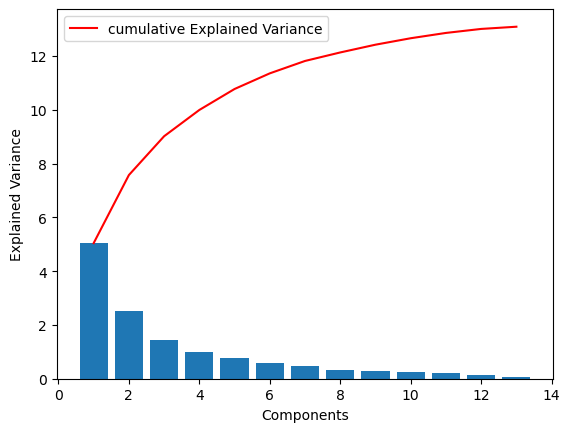

In [239]:
#visulization
plt.bar(range(1,len(pca1.explained_variance_)+1),pca1.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.plot(range(1,len(pca1.explained_variance_)+1),
         np.cumsum(pca1.explained_variance_),
         c="red",
         label="cumulative Explained Variance")
plt.legend(loc="upper left")


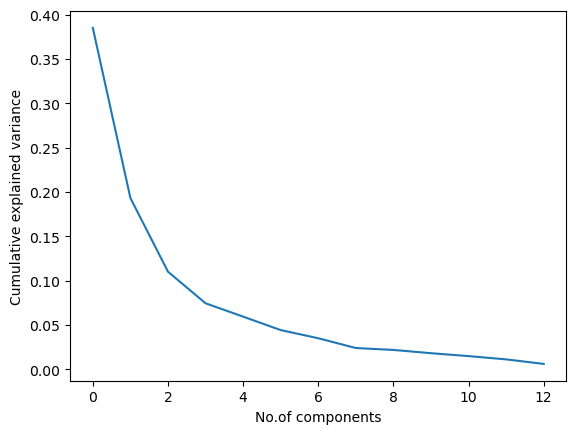

In [241]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel("No.of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [249]:
pca2=PCA(3)
x_pca2=pca2.fit_transform(x_train)
pca2.explained_variance_ratio_

array([0.38521287, 0.19338129, 0.11029713])

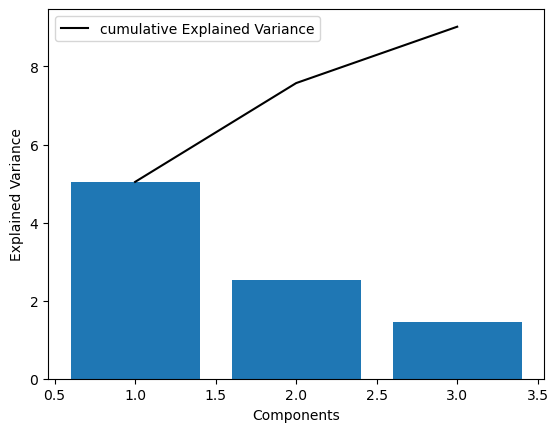

In [251]:
#visulization
plt.bar(range(1,len(pca2.explained_variance_)+1),pca2.explained_variance_)
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.plot(range(1,len(pca2.explained_variance_)+1),
         np.cumsum(pca2.explained_variance_),
         c="black",
         label="cumulative Explained Variance")
plt.legend(loc="upper left")

In [253]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
kmeans=cluster.KMeans(n_clusters=5,init="k-means++")
kmeans=kmeans.fit(x_pca2)
label=kmeans.fit_predict(x_pca2)
print(label)
print(len(label))
kmeans.cluster_centers_

[3 4 3 3 2 2 3 0 2 4 1 3 4 0 4 4 1 0 1 2 4 0 2 3 0 0 0 4 1 2 2 0 3 0 1 0 3
 3 2 2 0 4 3 2 0 2 3 1 3 1 4 2 3 3 0 0 4 3 1 4 3 1 0 0 0 2 0 3 0 4 0 2 0 4
 2 2 2 2 3 3 2 3 2 3 4 3 2 2 3 1 4 0 4 3 4 4 3 4 2 3 3 0 3 3 1 2 2 0 1 2 4
 2 1 2 4 1 0 3 0 4 3 3 4 3 1 3 0 4 2 3 1 4 2 4 4 1 4 1 1 1 2 1]
142


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 1.59059508,  0.71510711,  0.60404981],
       [-2.2522814 ,  0.06229075,  0.44877709],
       [-0.479384  ,  2.14383599, -0.10037306],
       [ 2.7248224 , -1.20726949, -0.32198508],
       [-2.7198585 , -1.60073147, -0.40545076]])

In [255]:
kmeans1=cluster.KMeans(n_clusters=3,random_state=0,n_init=10).fit(x_pca2)
kmeans1.labels_

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [257]:
kmeans1.predict(x_pca2)

array([1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [259]:
kmeans1.cluster_centers_

array([[-0.08404944,  1.86997924,  0.22664544],
       [ 2.43414873, -0.84831642, -0.01405961],
       [-2.6743878 , -1.07598143, -0.23127275]])

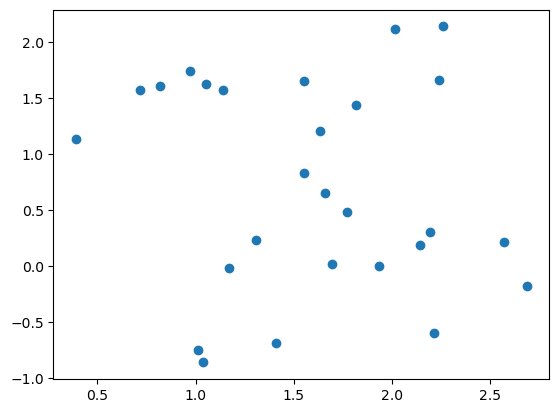

In [261]:
fval=x_pca2[label==0]
plt.scatter(fval[:,0],fval[:,1])
plt.show()

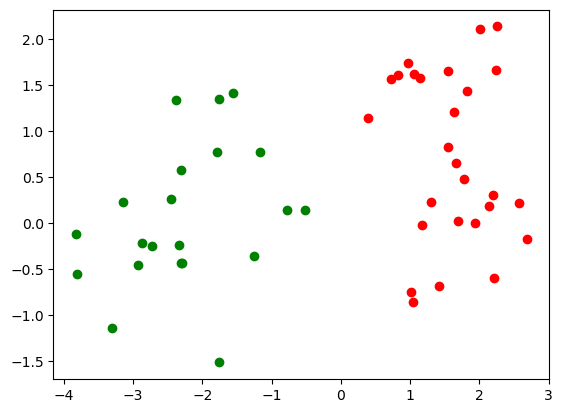

In [265]:
fval2=x_pca2[label==1]
plt.scatter(fval[:,0],fval[:,1],color="red")
plt.scatter(fval2[:,0],fval2[:,1],color="green")
plt.show()


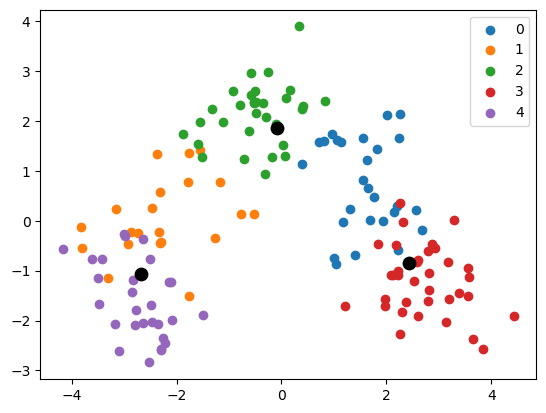

In [267]:
centroid=kmeans1.cluster_centers_
ulabel=np.unique(label)
for i in ulabel:
    plt.scatter(x_pca2[label==i,0],x_pca2[label==i,1],label=i)
plt.scatter(centroid[:,0],centroid[:,1],s=80,color="black")
plt.legend()
plt.show()